<a href="https://colab.research.google.com/github/hung51607602/COMP3057/blob/main/VGGALEXNETRESNET_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pretrained Alexnet in PyTorch

### 🧱 AlexNet Architecture Overview

| Block     | Layer Type                                    | Output Shape (for 224×224 input) |
| :-------- | :-------------------------------------------- | :------------------------------- |
| **Input** | –                                             | 3 × 224 × 224                    |
| **B1**    | Conv2d (3→96, kernel=11, stride=4, padding=2) | 96 × 55 × 55                     |
|           | ReLU                                          | 96 × 55 × 55                     |
|           | MaxPool2d (kernel=3, stride=2)                | 96 × 27 × 27                     |
| **B2**    | Conv2d (96→256, kernel=5, padding=2)          | 256 × 27 × 27                    |
|           | ReLU                                          | 256 × 27 × 27                    |
|           | MaxPool2d (kernel=3, stride=2)                | 256 × 13 × 13                    |
| **B3**    | Conv2d (256→384, kernel=3, padding=1)         | 384 × 13 × 13                    |
|           | ReLU                                          | 384 × 13 × 13                    |
| **B4**    | Conv2d (384→384, kernel=3, padding=1)         | 384 × 13 × 13                    |
|           | ReLU                                          | 384 × 13 × 13                    |
| **B5**    | Conv2d (384→256, kernel=3, padding=1)         | 256 × 13 × 13                    |
|           | ReLU                                          | 256 × 13 × 13                    |
|           | MaxPool2d (kernel=3, stride=2)                | 256 × 6 × 6                      |
| **FC**    | Flatten                                       | 9216                             |
|           | Linear (9216 → 4096) + ReLU + Dropout         | 4096                             |
|           | Linear (4096 → 4096) + ReLU + Dropout         | 4096                             |
|           | Linear (4096 → 1000)                          | 1000                             |

---

This is the AlexNet for ImageNet Classification

### Step 1: Load Pretrained AlexNet
This cell imports deep learning frameworks (e.g., **PyTorch/Torchvision**).
They give us building blocks like **tensors, layers, losses, optimizers**, and GPU acceleration. ⚡
If CUDA isn’t available, the code should still run on CPU — just **slower**. Consider a `device` switch (`cuda` vs `cpu`).



In [1]:
import torch
import torchvision.models as models # 这个是

# models.alexnet(): 调用 TorchVision 中的 AlexNet 模型架构，这是个 经典卷积神经网络结构
#pretrained=True: 关键参数，表示加载在 ImageNet 数据集上预训练好的权重
alexnet = models.alexnet(pretrained=True)
alexnet.eval()  # Make sure model is in inference mode ，将模型切换到推理模式，没开eval 就是训练模式

print(alexnet)

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


100%|██████████| 233M/233M [00:01<00:00, 153MB/s]


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 



```
# 此内容为代码格式
```

#### torch.save() Function

##### Syntax
```python
torch.save(obj, f)
```

##### Parameters
- **obj**: Object to save (can be model, state_dict, or any Python object)
- **f**: File path or file-like object (usually with .pth or .pt extension)

##### Common patterns
```python
# Save only weights (recommended)
torch.save(model.state_dict(), 'weights.pth')

# Save entire model
torch.save(model, 'model.pth')

# Save training checkpoint
torch.save({
    'epoch': epoch,
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'loss': loss,
}, 'checkpoint.pth')
```

In [2]:
import os
# Method 1: Save only model parameters (RECOMMENDED)
# This is the preferred method in production

##write codes here


In [3]:
# Method 2: Save entire model (architecture + weights)
# Easier but less flexible


#### torch.load() Function

##### Syntax
```python
torch.load(f, map_location=None)
```

##### Parameters
- **f**: File path or file-like object to load from
- **map_location**: Where to load the model
  - `None`: Load to same device where it was saved
  - `'cpu'`: Load to CPU
  - `'cuda:0'`: Load to GPU 0
  - `torch.device('cpu')`: Load to CPU device

##### Examples
```python
# Load state_dict
state_dict = torch.load('weights.pth')

# Load to CPU regardless of where it was saved
state_dict = torch.load('weights.pth', map_location='cpu')

# Load to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
state_dict = torch.load('weights.pth', map_location=device)
```

In [4]:
# Load weights into new model (RECOMMENDED)
# This is the most flexible and portable method


### Step 2: Load CIFAR-10 (Just One Sample)
We load plotting tools so we can **visualize data and training curves**. 📈

Good plots help us spot issues like **overfitting (training up, test down)** or **vanishing gradients**.



100%|██████████| 170M/170M [00:02<00:00, 61.3MB/s]


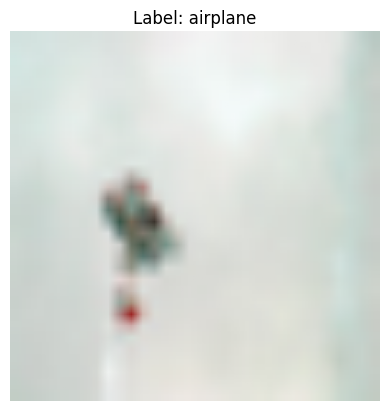

In [5]:
import torchvision.transforms as transforms
import torchvision.datasets as datasets # 预置数据集加载模块
from torch.utils.data import DataLoader # 数据批量加载器
import matplotlib.pyplot as plt
import numpy as np

# Resize CIFAR-10 image to 224x224 for AlexNet
# Compose 组合多个图像变换操作
transform = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor()
])

# 加载 CIFAR-10 数据集
# Parameter train (False 加载测试集， True 加载训练集， download 如果本地没有对应的数据集则自动下载， Transform 应用之前的 预处理的数据集，不用自己处理)
dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
loader = DataLoader(dataset, batch_size=1, shuffle=True)

# Get one image
image, label = next(iter(loader))

# Show the image
plt.imshow(np.transpose(image[0].numpy(), (1, 2, 0)))
plt.title(f"Label: {dataset.classes[label[0]]}")
plt.axis('off')
plt.show()


### Step 3: Forward Pass through Pretrained AlexNet
This cell performs **model inference** using the pretrained AlexNet model and then interprets the numerical predictions.

1. **Disable Gradient Tracking**  
   The `torch.no_grad()` context disables gradient computation during inference.  
   This reduces memory usage and speeds up evaluation since backpropagation is not required.

2. **Forward Pass**  
   The image tensor is passed through the AlexNet model.  
   The output tensor has shape `(1, 1000)`, representing the model’s raw prediction scores (logits) across 1000 ImageNet classes.

3. **Top-K Predictions**  
   The command `torch.topk(output, 5)` retrieves the indices of the five highest logits, i.e., the model’s top-5 most confident predictions.  
   These indices correspond to category IDs in the ImageNet dataset.  
   To interpret them, we need to map these numerical IDs to their textual class labels.



In [6]:
with torch.no_grad():
    output = alexnet(image)  # shape: (1, 1000)

print("Output shape:", output.shape)
print("Top 5 logits:", torch.topk(output, 5).indices)

# ---- Step 2: Download the ImageNet label mapping ----
import json, urllib.request

# The official class index file from PyTorch's GitHub
url = "https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt"
urllib.request.urlretrieve(url, "imagenet_classes.txt")

# Load the labels into a list
with open("imagenet_classes.txt") as f:
    labels = [line.strip() for line in f.readlines()]

# ---- Step 3: Decode the Top-5 indices into readable labels ----
top5_indices = torch.topk(output, 5).indices[0]
print("\nTop-5 Predictions (index → label):")
for idx in top5_indices:
    print(f"{idx.item():>4} → {labels[idx]}")

Output shape: torch.Size([1, 1000])
Top 5 logits: tensor([[ 73, 111, 783, 680,  38]])

Top-5 Predictions (index → label):
  73 → barn spider
 111 → nematode
 783 → screw
 680 → nipple
  38 → banded gecko


### Print AlexNet in PyTorch

In [7]:
import torchvision.models as models

alexnet = models.alexnet(pretrained=True)
print("📦 Features:\n", alexnet.features)
print("\n🎯 Classifier:\n", alexnet.classifier)


📦 Features:
 Sequential(
  (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (4): ReLU(inplace=True)
  (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU(inplace=True)
  (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): ReLU(inplace=True)
  (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
)

🎯 Classifier:
 Sequential(
  (0): Dropout(p=0.5, inplace=False)
  (1): Linear(in_features=9216, out_features=4096, bias=True)
  (2): ReLU(inplace=True)
  (3): Dropout(p=0.5, inplace=False)
  (4): Linear(in_features=4096,

### Visualize First Conv Layer Filters


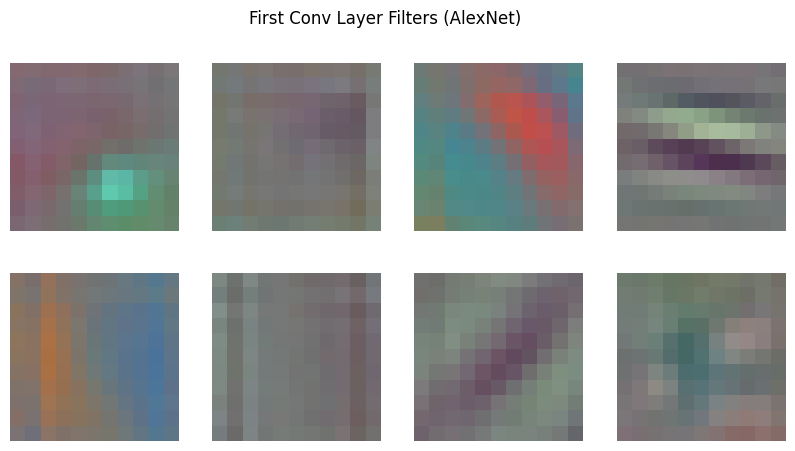

In [8]:
import matplotlib.pyplot as plt

# Get filters from the first Conv layer
filters = alexnet.features[0].weight.data.clone()

# Normalize to [0, 1] for visualization
filters = (filters - filters.min()) / (filters.max() - filters.min())

# Plot first 8 filters
fig, axes = plt.subplots(2, 4, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    img = filters[i].permute(1, 2, 0).numpy()
    ax.imshow(img)
    ax.axis('off')
plt.suptitle("First Conv Layer Filters (AlexNet)")
plt.show()


## 🧠 Build VGG-16 in PyTorch

**VGGNet**, introduced in 2014 by the Visual Geometry Group at Oxford, is known for its **simplicity and uniform architecture** using only small 3×3 convolution filters. It significantly deepened networks and showed that deeper models can lead to better performance.

---

### 🧱 VGG-16 Architecture Overview

| Block | Layer Type             | Output Shape (for 224×224 input)       |
|-------|------------------------|----------------------------------------|
| Input | -                      | 3 × 224 × 224                          |
| B1    | Conv2d (3→64)          | 64 × 224 × 224                         |
|       | Conv2d (64→64)         | 64 × 224 × 224                         |
|       | MaxPool2d              | 64 × 112 × 112                         |
| B2    | Conv2d (64→128)        | 128 × 112 × 112                        |
|       | Conv2d (128→128)       | 128 × 112 × 112                        |
|       | MaxPool2d              | 128 × 56 × 56                          |
| B3    | Conv2d (128→256)       | 256 × 56 × 56                          |
|       | Conv2d (256→256)       | 256 × 56 × 56                          |
|       | Conv2d (256→256)       | 256 × 56 × 56                          |
|       | MaxPool2d              | 256 × 28 × 28                          |
| B4    | Conv2d (256→512)       | 512 × 28 × 28                          |
|       | Conv2d (512→512)       | 512 × 28 × 28                          |
|       | Conv2d (512→512)       | 512 × 28 × 28                          |
|       | MaxPool2d              | 512 × 14 × 14                          |
| B5    | Conv2d (512→512)       | 512 × 14 × 14                          |
|       | Conv2d (512→512)       | 512 × 14 × 14                          |
|       | Conv2d (512→512)       | 512 × 14 × 14                          |
|       | MaxPool2d              | 512 × 7 × 7                            |
| FC    | Linear (512×7×7 → 4096)| 4096                                   |
|       | Dropout + ReLU         | 4096                                   |
|       | Linear (4096 → 4096)   | 4096                                   |
|       | Dropout + ReLU         | 4096                                   |
|       | Linear (4096 → 1000)   | 1000                                   |

---



### VGGNet Standard Implementation:

In [9]:
import torch
import torch.nn as nn

class VGG16(nn.Module):
    def __init__(self, num_classes=1000):
        super(VGG16, self).__init__()
        self.features = nn.Sequential(
            # Block 1
            nn.Conv2d(3, 64, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Block 2
            nn.Conv2d(64, 128, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Block 3
            nn.Conv2d(128, 256, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Block 4
            nn.Conv2d(256, 512, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Block 5
            nn.Conv2d(512, 512, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096), nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096), nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)  # flatten all dimensions except batch
        x = self.classifier(x)
        return x


### Use your implemented model



In [10]:
model = VGG16(num_classes=1000)
dummy_input = torch.randn(1, 3, 224, 224)
output = model(dummy_input)
print("Output shape:", output.shape)  # Expected: [1, 1000]

Output shape: torch.Size([1, 1000])


### Pretrained VGG16 in PyTorch

### 🔹 Step 1: Load VGG16 Pretrained Model



In [11]:
import torch
import torchvision.models as models

vgg16 = models.vgg16(pretrained=True)
vgg16.eval()  # Set to inference mode

print(vgg16)


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


100%|██████████| 528M/528M [00:04<00:00, 123MB/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

### Step 2: Load and Preprocess CIFAR-10 Image




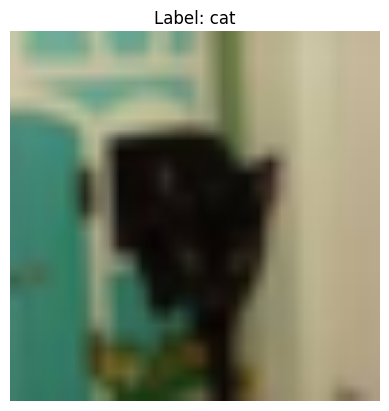

In [12]:
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to match VGG input
    transforms.ToTensor()
])

dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
loader = DataLoader(dataset, batch_size=1, shuffle=True)

image, label = next(iter(loader))

# Show image
plt.imshow(np.transpose(image[0].numpy(), (1, 2, 0)))
plt.title(f"Label: {dataset.classes[label[0]]}")
plt.axis('off')
plt.show()


### Step 3: Run Inference with VGG16
Switch to `model.eval()` and wrap inference with `torch.no_grad()` to **disable gradients**.


In [13]:
with torch.no_grad():
    output = vgg16(image)  # Output: shape (1, 1000)

print("Output shape:", output.shape)
print("Top 5 class indices:", torch.topk(output, 5).indices)


Output shape: torch.Size([1, 1000])
Top 5 class indices: tensor([[901, 556, 465, 906, 615]])


## Homework-1: Finsh the blank code cell in this section

## 🔍 What is a Residual Block?

A **Residual Block** is a key building block of ResNet.  
It allows the network to learn residuals — that is, instead of learning **`H(x)`**, it learns **`F(x) = H(x) - x`**, and the output becomes **`F(x) + x`**.

This makes training deep networks easier and more stable.

---

## 🧱 Structure of a Basic Residual Block

For input tensor of shape `(N, C, H, W)`:

| Layer       | Details                                     |
|-------------|---------------------------------------------|
| Conv1       | 3×3 Conv, `padding=1`, `stride=1`           |
| BatchNorm1  | `nn.BatchNorm2d`                            |
| ReLU        | Apply ReLU activation                       |
| Conv2       | 3×3 Conv, `padding=1`, `stride=1`           |
| BatchNorm2  | `nn.BatchNorm2d`                            |
| **Skip**    | Add input `x` to output                     |
| ReLU        | Apply final ReLU activation                 |

---

### Residual Block

Please implememt a Residual block here



In [14]:
### Write your codes here

### Test the Block




In [15]:
x = torch.randn(1, 16, 32, 32)  # Batch size 1, 16 channels, 32x32 image
block = SimpleResidualBlock(16)
y = block(x)

print("Input shape:", x.shape)
print("Output shape:", y.shape)


NameError: name 'SimpleResidualBlock' is not defined

### Build a **`5-Layer`** Residual Network in PyTorch

Define the a Residual Network with 5 Residual Blocks in the code cell below.

Check **input/output shapes** carefully to avoid dimension errors

In [ ]:
###Write your codes here

### Use Residual Network

Ensure your defined networks can run properly.  You cannot modify the codes in the below code cell



In [ ]:
model = TinyResNet(channels=16)
x = torch.randn(1, 16, 32, 32)
y = model(x)

print("Input shape:", x.shape)
print("Output shape:", y.shape)


## 🧩 Homework-2: Baseline Training of AlexNet on CIFAR-10

### 🎯 Objective

Implement and Train **AlexNet** on the **CIFAR-10** dataset using **PyTorch**, and save your trained model for submission.
---

### 📦 Dataset

**CIFAR-10** consists of 60,000 color images (32 × 32 pixels) across 10 classes:

> airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck

Use the official dataset from **`torchvision.datasets.CIFAR10`**.
Remember to split the data into **training** and **testing** sets, apply normalization, and resize to **224 × 224** (AlexNet’s input size).

---

### 🧠 Tasks

#### **1️⃣ Model Implementation and Training**

* Implement or load AlexNet (pretrained or from scratch).
* Train the model on CIFAR-10 for several epochs until the loss decreases and accuracy stabilizes.
* Record your **training loss** and **test accuracy** after each epoch.
* Aim for at least **80 % test accuracy**.

#### **2️⃣ Save the Trained Model**

After training finishes:

* Save the model parameters using **`torch.save()`**, for example:

  ```python
  torch.save(model.state_dict(), "alexnet_cifar10.pth")
  ```
* Verify that the file can be reloaded correctly before submission:

  ```python
  model.load_state_dict(torch.load("alexnet_cifar10.pth"))
  ```

#### **3️⃣ Report**

At the end of your notebook:

* Print the **final test accuracy** and **training time**.
* Include a short paragraph (≈ 100 words) reflecting on:

  > How well did the model learn?
  > What challenges did you face during training?

---

### 💾 Submission

Submit the following two items:

1. Your **Jupyter Notebook (`.ipynb`)** with code and results.
2. Your **saved model file (`alexnet_cifar10.pth`)**.

---

### ⏱ Runtime

* GPU: Colab (Tesla T4)
* Batch size: 64
* Epochs: 8 – 10
* Expected runtime: **10 – 20 minutes**
* File size of `.pth`: approximately **200–250 MB**

---

### 🧾 Grading Rubric

| Criterion          | Description                                         | Weight |
| :----------------- | :-------------------------------------------------- | :----- |
| **Implementation** | Model trains successfully and runs without errors   | 40 %   |
| **Accuracy**       | Achieves reasonable CIFAR-10 performance (≥ 80 %)   | 30 %   |
| **Model Saving**   | Correct use of `torch.save()` and valid `.pth` file | 20 %   |
| **Clarity**        | Clean code, brief explanation, and reflection       | 10 %   |

---

